In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk

In [3]:
data_path = "./data/Bike_rental_modified.csv"
header = [
    "instant", 
    "dteday",#nominal
    "season",#nominal
    "yr",#nominal
    "mnth",#nominal
    "holiday", #ordinal
    "weekday",#ordinal
    "workingday",#ordinal
    "weathersit",#ordinal
    "temp", #metrisch
    "atemp",#metrisch
    "hum",#metrisch
    "windspeed",#metrisch
    "casual",#metrisch
    "registered",#metrisch
    "cnt",#metrisch
    "intday"
]
bike_rental = pd.read_csv(data_path)

In [6]:
nominal = ['dteday', 'season', 'yr', 'mnth']
ordinal = ['holiday', 'weekday', 'workingday', 'weathersit']
metric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Deskriptive Statistik
print("Nominale Daten - Häufigkeiten:")
for col in nominal:
    print(f"\n{col}:")
    print(bike_rental[col].value_counts())

print("\nOrdinale Daten - Häufigkeiten:")
for col in ordinal:
    print(f"\n{col}:")
    print(bike_rental[col].value_counts())

print("\nMetrische Daten - Statistische Kennzahlen:")
print(bike_rental[metric].describe())

Nominale Daten - Häufigkeiten:

dteday:
dteday
2012-06-30    1
2011-01-01    1
2011-01-02    1
2012-06-14    1
2012-06-13    1
             ..
2011-01-08    1
2011-01-07    1
2011-01-06    1
2011-01-05    1
2011-01-04    1
Name: count, Length: 547, dtype: int64

season:
season
2    184
1    170
3    104
4     89
Name: count, dtype: int64

yr:
yr
0    365
1    182
Name: count, dtype: int64

mnth:
mnth
1     62
3     62
5     62
4     60
6     60
2     57
7     31
8     31
10    31
12    31
9     30
11    30
Name: count, dtype: int64

Ordinale Daten - Häufigkeiten:

holiday:
holiday
0    532
1     15
Name: count, dtype: int64

weekday:
weekday
6    79
0    78
1    78
2    78
3    78
4    78
5    78
Name: count, dtype: int64

workingday:
workingday
1    375
0    172
Name: count, dtype: int64

weathersit:
weathersit
1    349
2    181
3     17
Name: count, dtype: int64

Metrische Daten - Statistische Kennzahlen:
             temp       atemp         hum   windspeed       casual  \
count  54

Grafische Darstellung cnt casual registered

Text(0, 0.5, 'cnt')

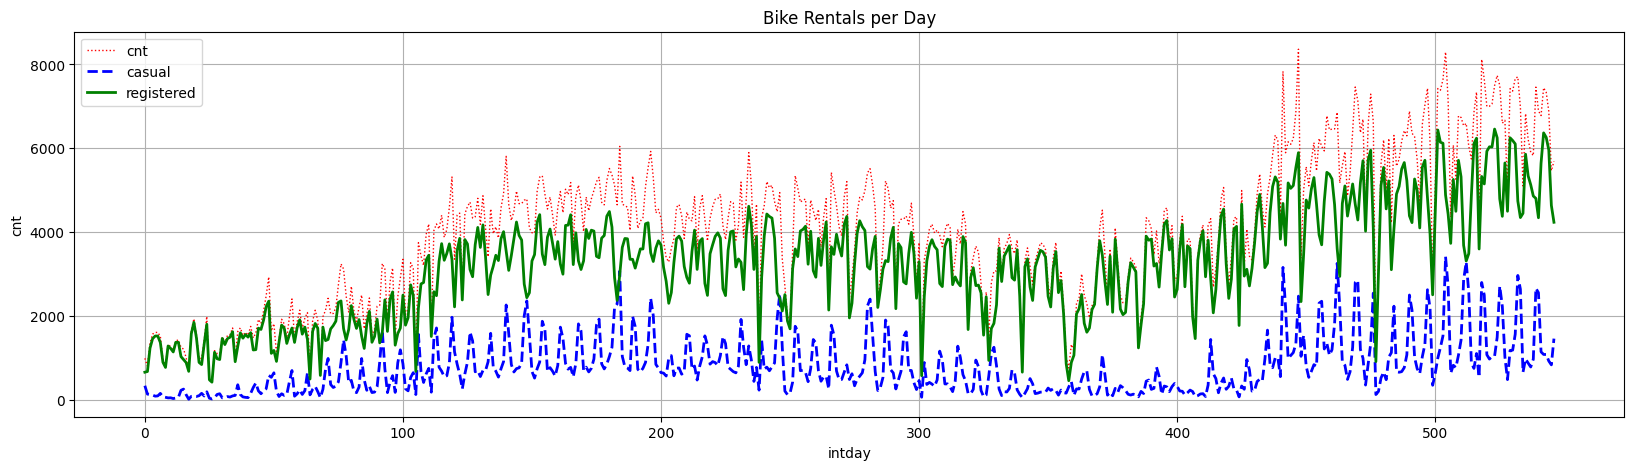

In [25]:
fig,ax = plt.subplots(figsize=(20, 5))
ax.plot(bike_rental['intday'], bike_rental["cnt"], label = "cnt",color = "red", linestyle = ":",linewidth=1)
ax.plot(bike_rental['intday'], bike_rental["casual"], label = "casual",color = "blue", linestyle = "--", linewidth=2)
ax.plot(bike_rental['intday'], bike_rental["registered"], label = "registered",color = "green", linestyle = "solid", linewidth=2) 
ax.set_title('Bike Rentals per Day')    
ax.grid(True) 
ax.legend() 
ax.set_xlabel('intday') 
ax.set_ylabel('cnt') 

Bei den casual Daten sind regelmäßige Spikes erkennbar, besonders außerhalb der Wintermonate, es handelt scih hier vermutlich um Anstiege zu den Wochenenden. 
Im Gegensatz dazu sind die Reservierungen zu Wochenenden eher geringer.
Im Gesamten lässt sich ein Ansteig erkennen, gut erkennbar über einen jahr zu Jahr Vergleich. 

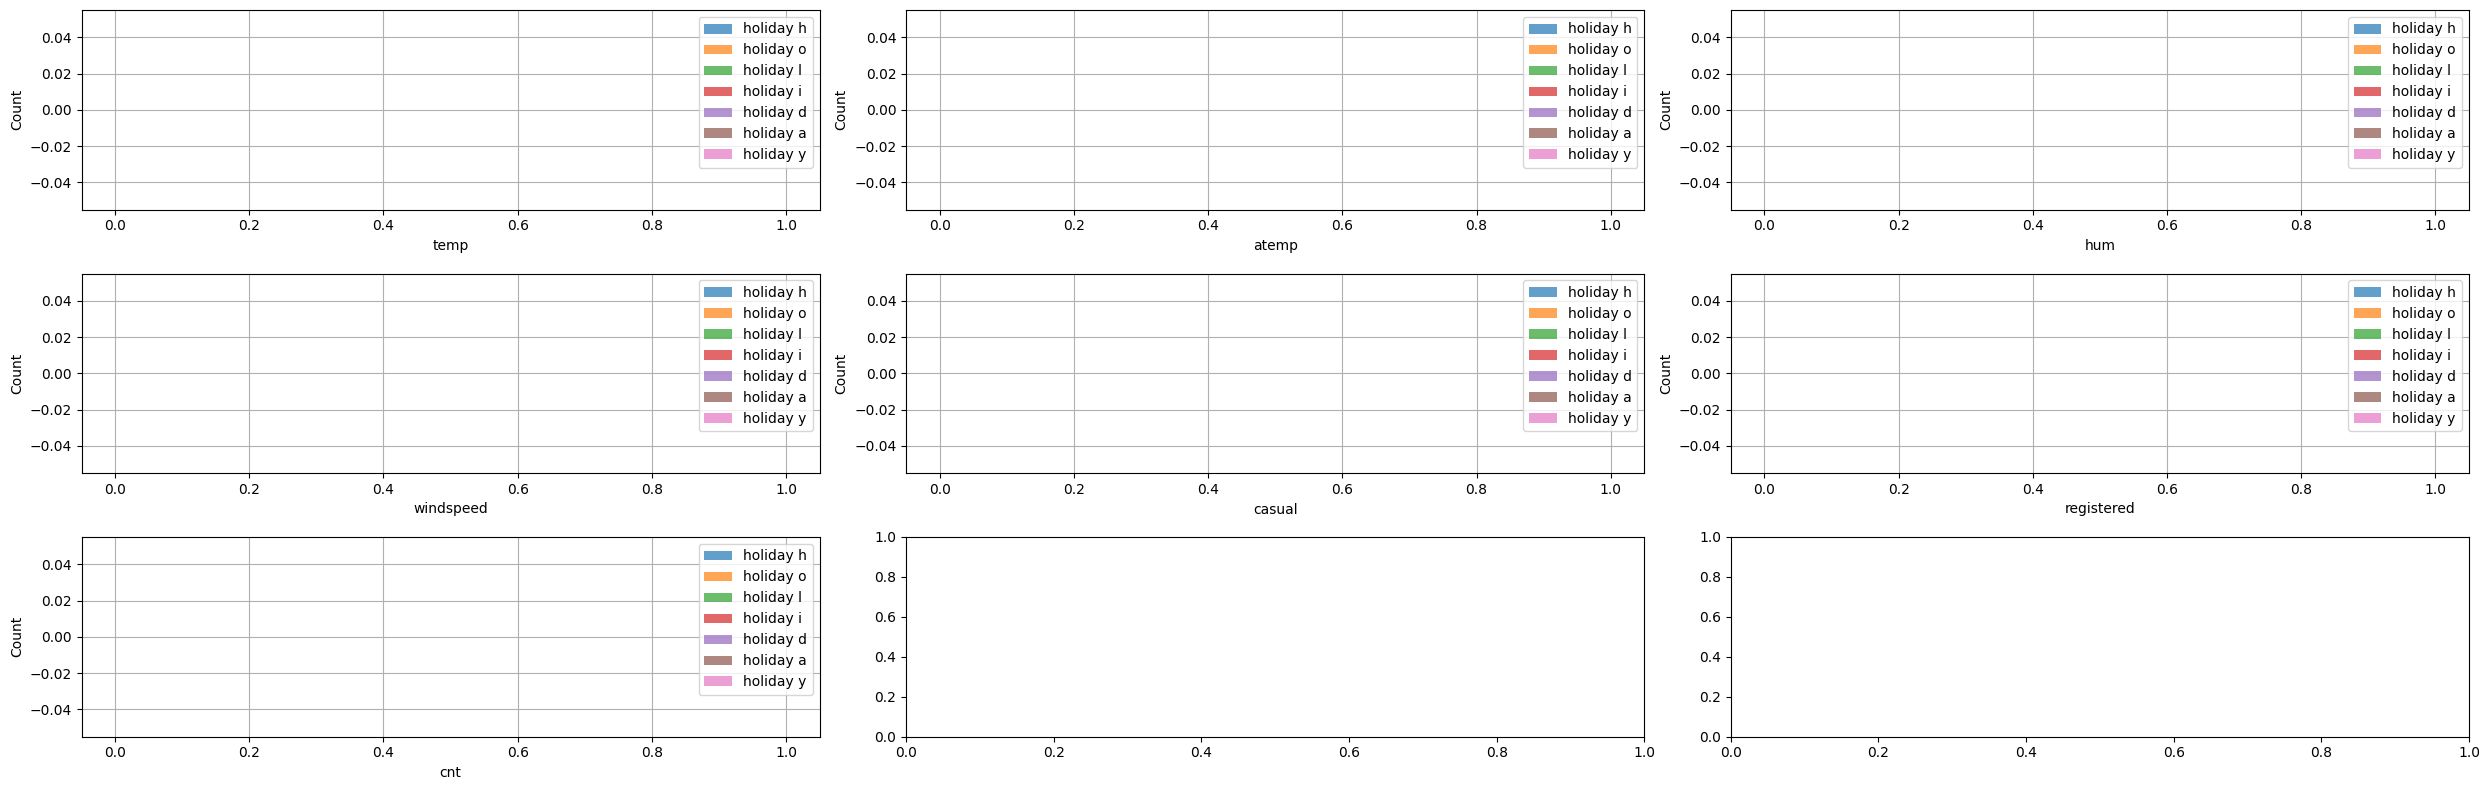

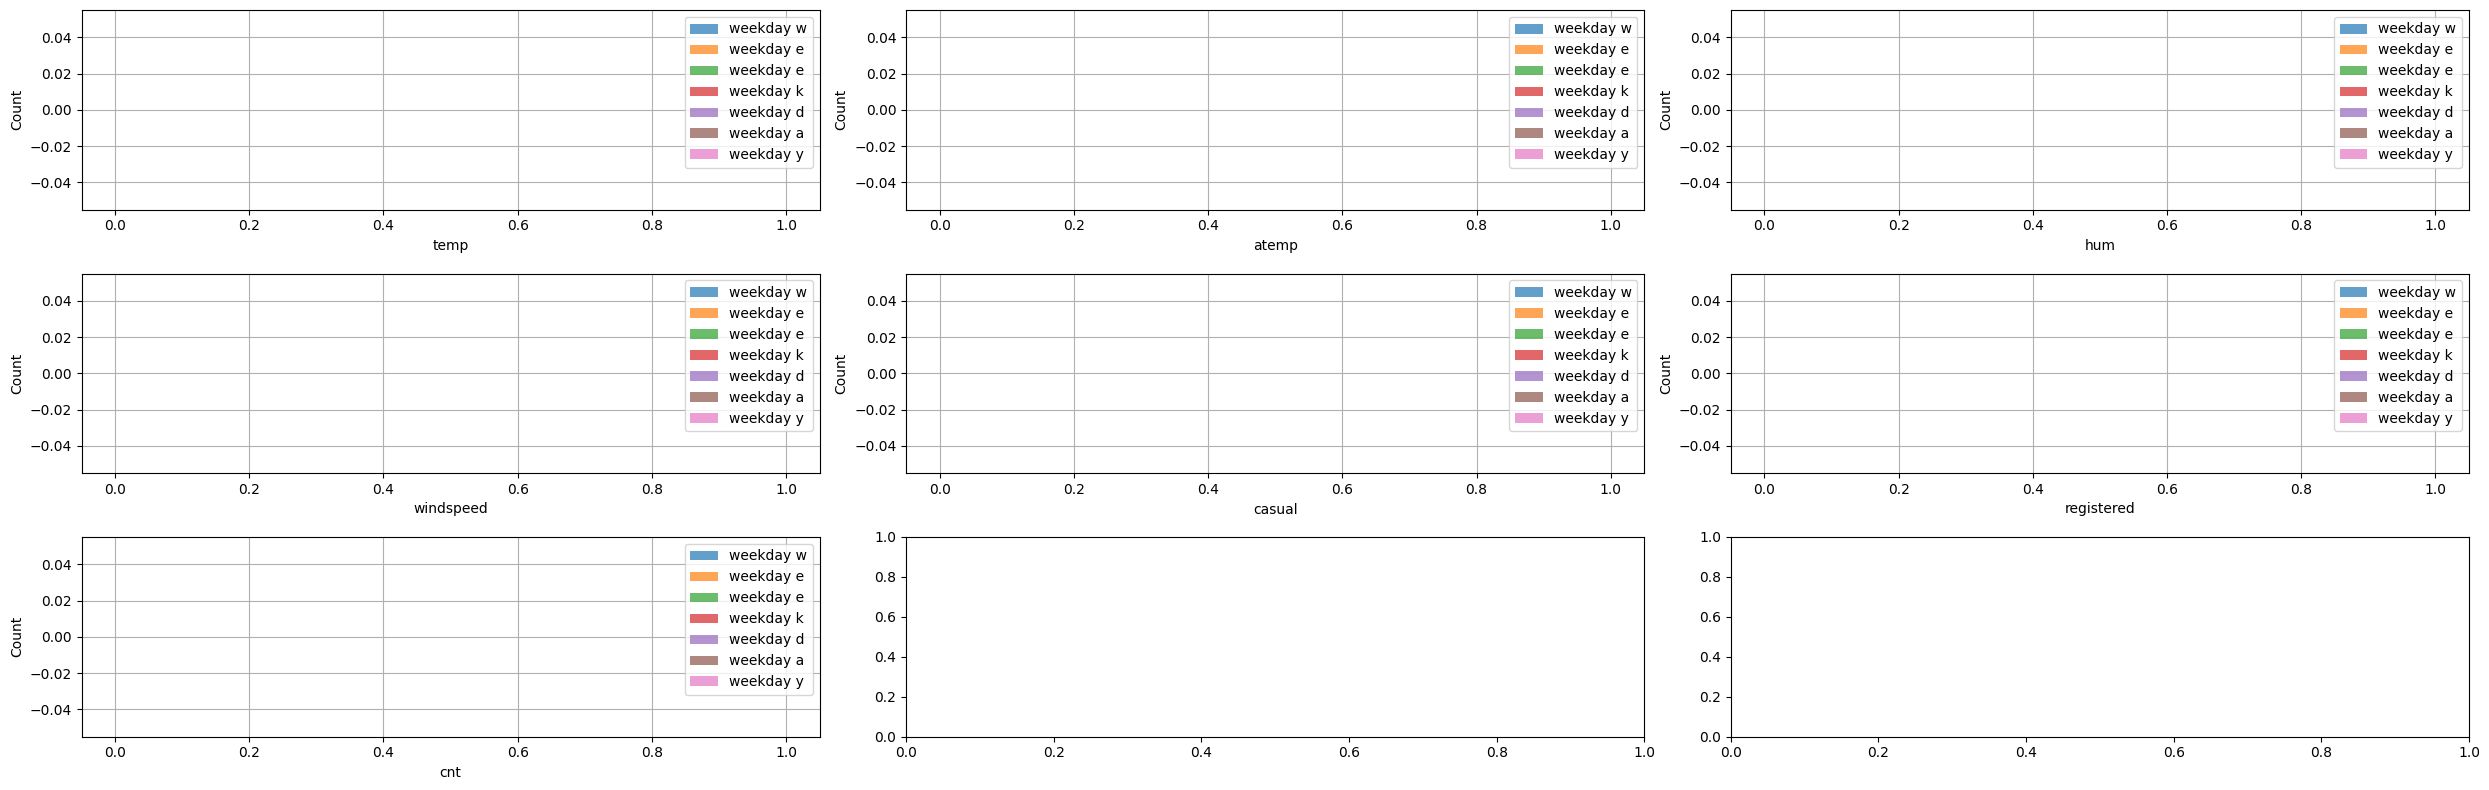

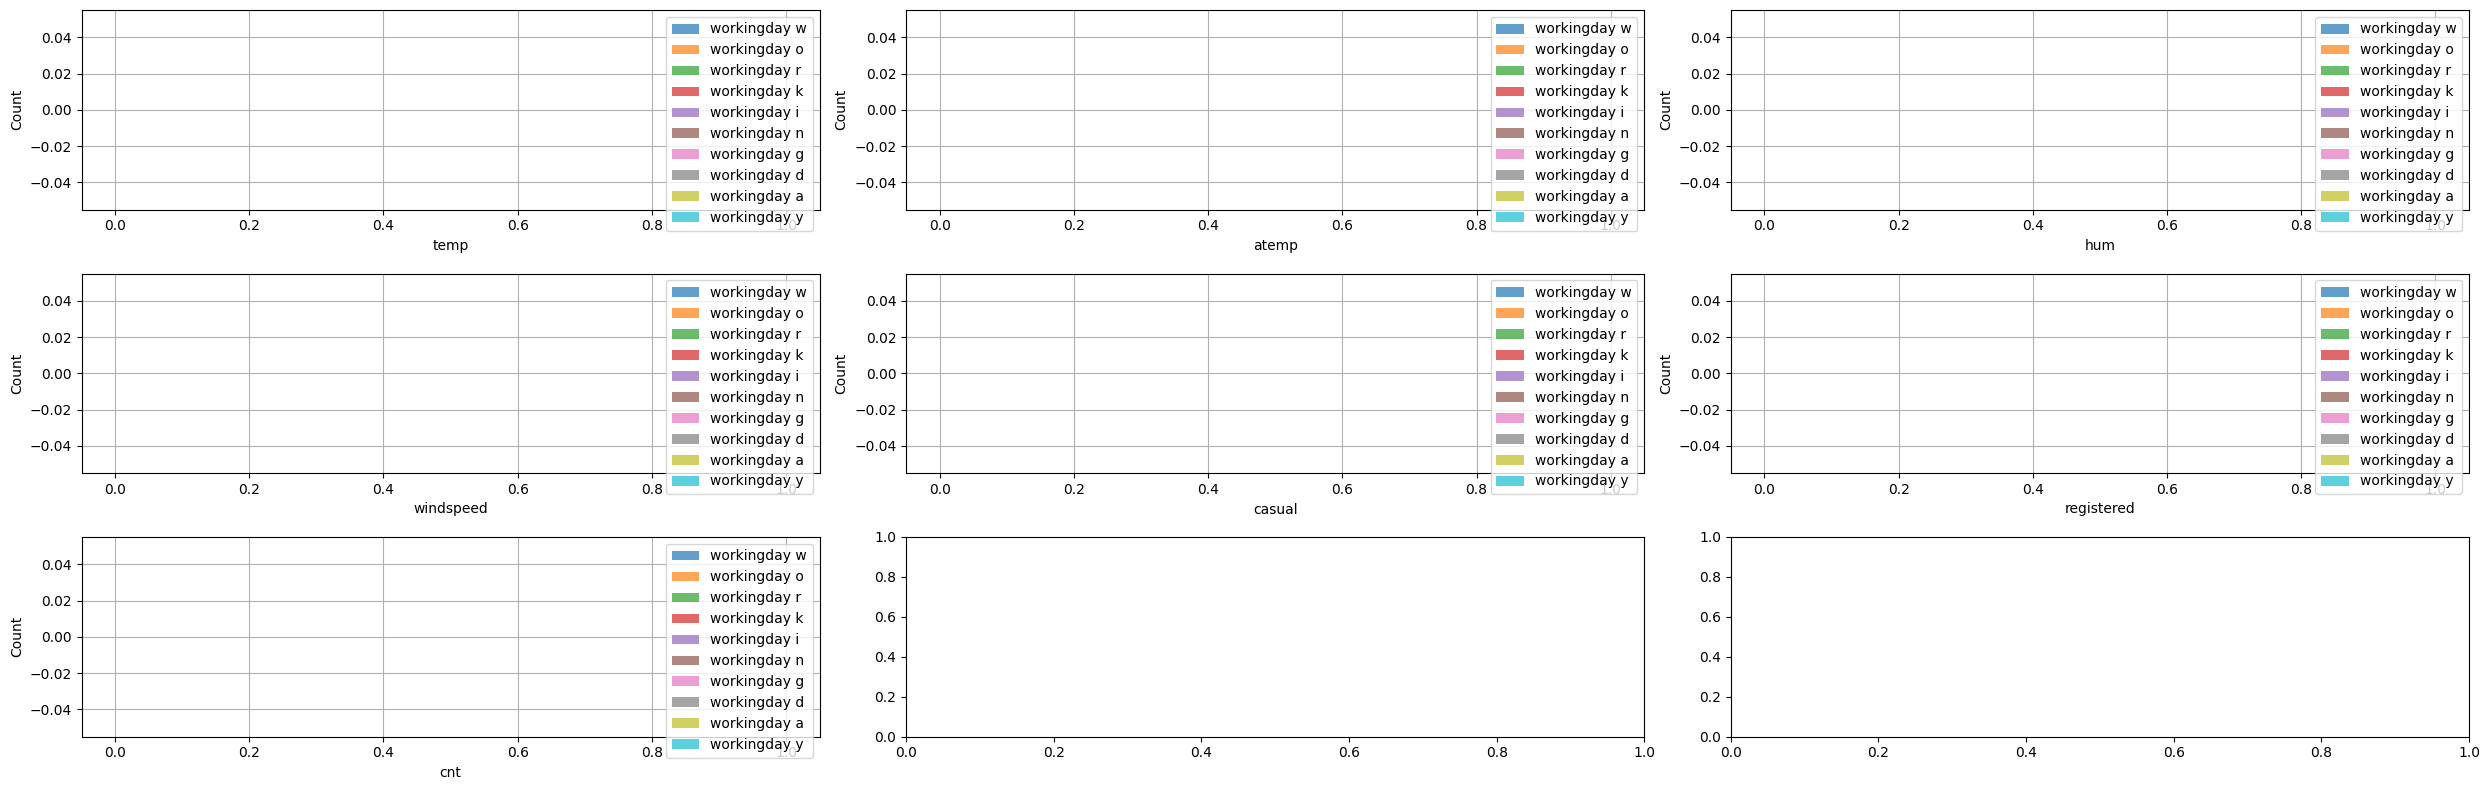

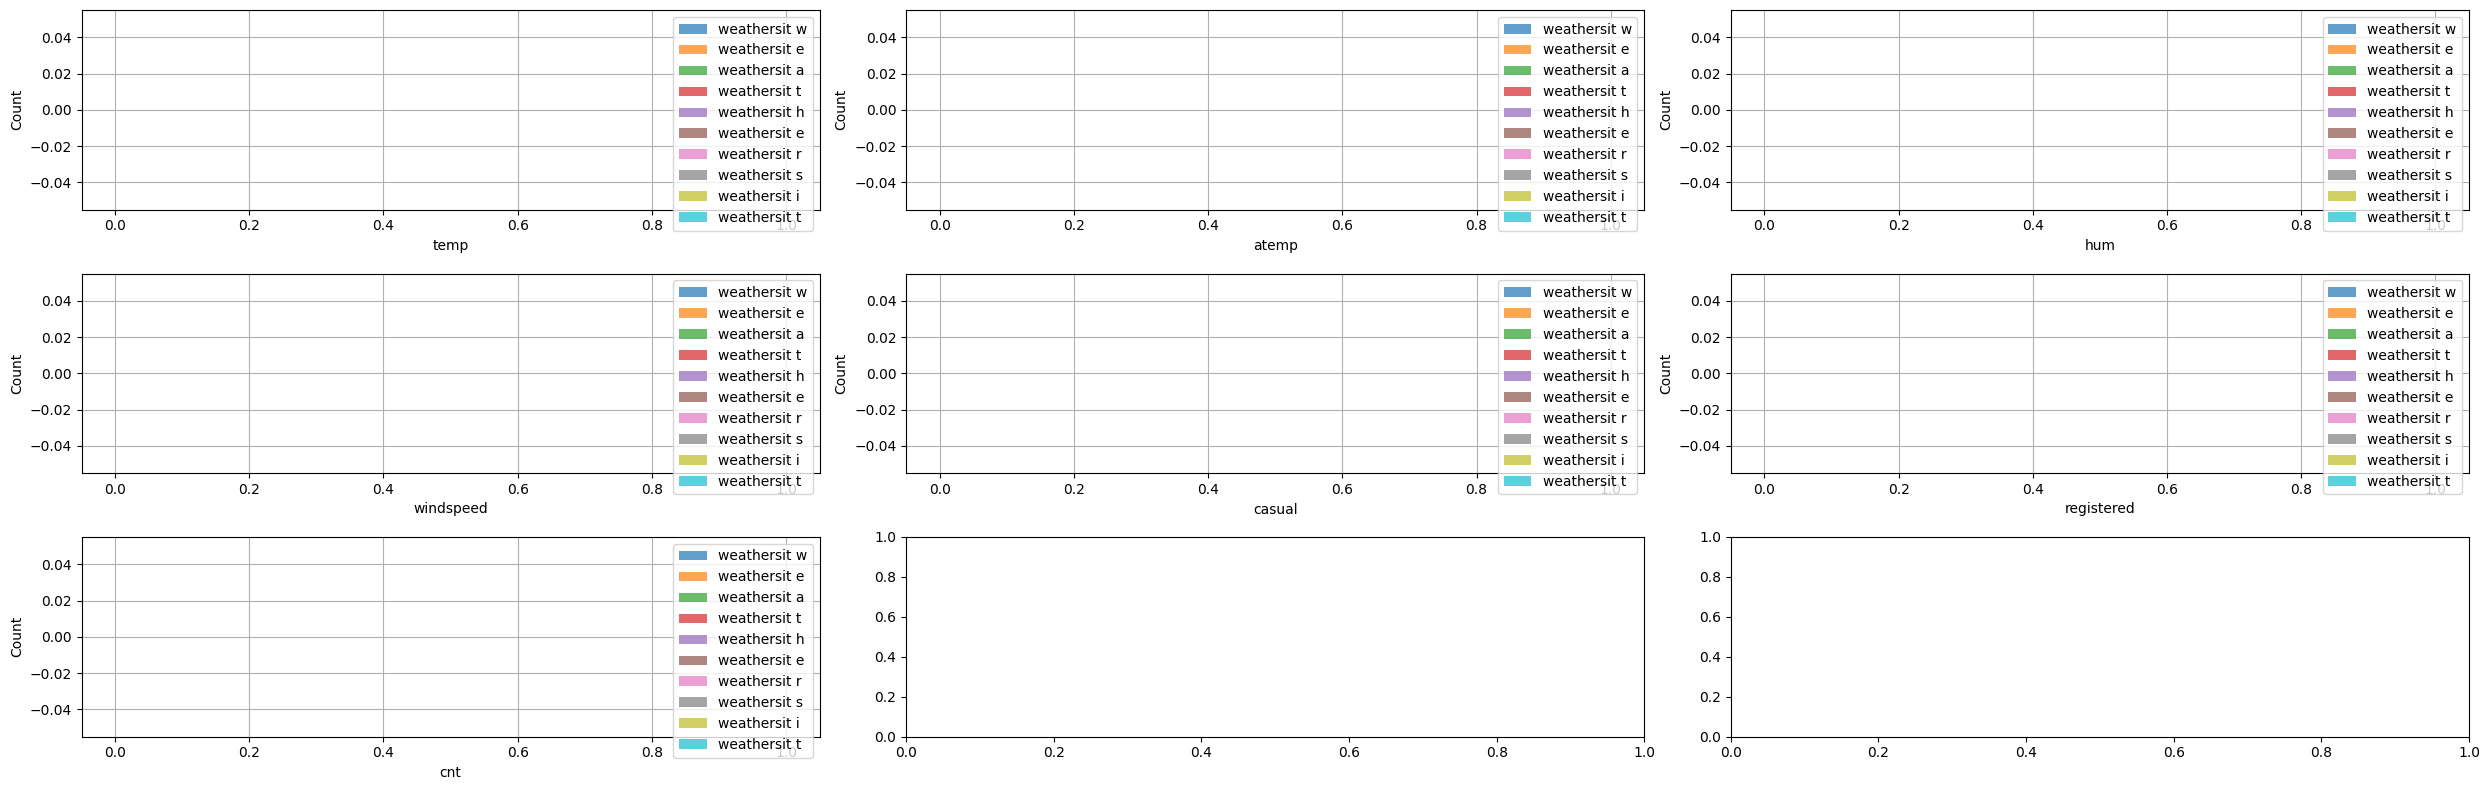

In [30]:
for category in  ordinal:   
    n = len(metric)
    n_row = 3
    n_col = (n + n_row - 1) // n_row  # Berechnet benötigte Spalten
    fig, ax = plt.subplots(n_row, n_col, figsize=(25, 8))
    ax = ax.flatten()

    
    for i, key in enumerate(metric):
        for j, cat in enumerate(category):
            subset = bike_rental[bike_rental[category] == cat]
            ax[i].hist(subset[key], alpha=0.7, label=f'{category} {cat}')
        ax[i].set_xlabel(key)
        ax[i].set_ylabel('Count')
        ax[i].legend()
        ax[i].grid(True)
    
    plt.tight_layout()
    plt.show()